In [1]:
!pip install yfinance pandas matplotlib seaborn
!pip install nltk textblob
!pip install scikit-learn
!pip install tensorflow keras
!pip install python-binance

In [4]:
import pandas as pd
import yfinance as yf
cryptos = {
    "BTC-USD": "Bitcoin",
    "ETH-USD": "Ethereum",
    "SOL-USD": "Solana",
    "AVAX-USD": "Avalanche",
    "DOT-USD": "Polkadot",
    "LTC-USD": "Litecoin",
    "LINK-USD": "Chainlink",
    "BNB-USD": "Binance Coin",
    "XRP-USD": "Ripple",
    "ADA-USD": "Cardano"
}

start_date = "2023-01-01"
end_date = "2024-12-31"

all_data = {}

for ticker, name in cryptos.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Close']].rename(columns={"Close": name})
    all_data[name] = data

df_prices = pd.concat(all_data.values(), axis=1)

df_prices.to_csv("crypto_prices.csv")

df_prices.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Bitcoin,Ethereum,Solana,Avalanche,Polkadot,Litecoin,Chainlink,Binance Coin,Ripple,Cardano
Ticker,BTC-USD,ETH-USD,SOL-USD,AVAX-USD,DOT-USD,LTC-USD,LINK-USD,BNB-USD,XRP-USD,ADA-USD
Date,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,9.982173,10.865915,4.370816,70.815659,5.622443,244.136978,0.338763,0.249771
2023-01-02,16688.470703,1214.656616,11.272967,11.153615,4.489374,74.862907,5.687627,245.535904,0.348556,0.253828
2023-01-03,16679.857422,1214.778809,13.344046,11.384450,4.524364,75.602722,5.622096,246.133362,0.343824,0.252796
2023-01-04,16863.238281,1256.526611,13.435113,12.077613,4.630191,75.433907,5.804032,259.119690,0.347794,0.267677
2023-01-05,16836.736328,1250.438599,13.419330,11.740196,4.617662,74.250809,5.647835,256.422852,0.338039,0.269102


In [6]:
print(df_prices.isnull().sum())

Price         Ticker  
Bitcoin       BTC-USD     0
Ethereum      ETH-USD     0
Solana        SOL-USD     0
Avalanche     AVAX-USD    0
Polkadot      DOT-USD     0
Litecoin      LTC-USD     0
Chainlink     LINK-USD    0
Binance Coin  BNB-USD     0
Ripple        XRP-USD     0
Cardano       ADA-USD     0
dtype: int64


In [8]:
df_prices = df_prices.dropna()
df_prices = df_prices.fillna(df_prices.mean())

/var/folders/6k/7zpq8_wj3zb9tnf__3yh3qs80000gn/T/ipykernel_27227/1640210434.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df_prices.index, df_prices[column], label=column)


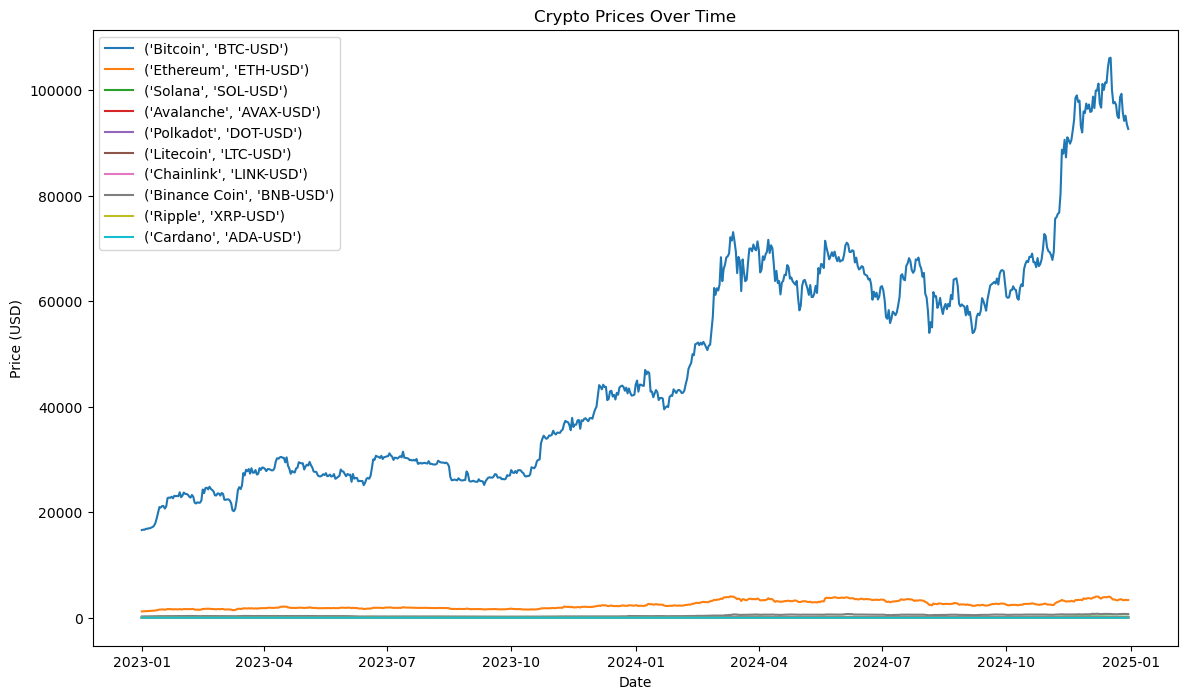

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for column in df_prices.columns:
    plt.plot(df_prices.index, df_prices[column], label=column)

plt.title("Crypto Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


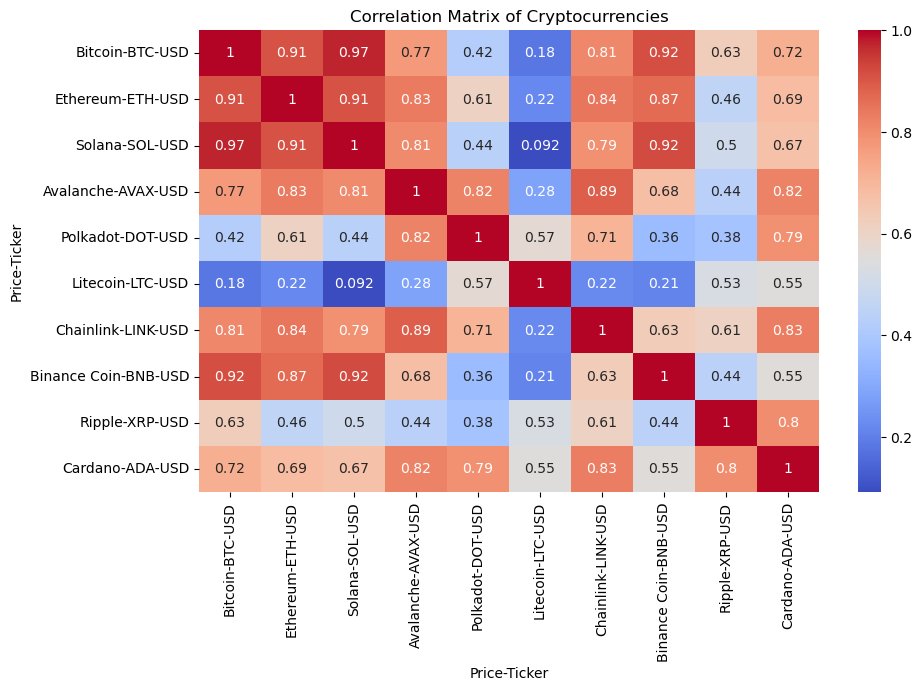

In [12]:
import seaborn as sns
corr_matrix = df_prices.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Cryptocurrencies")
plt.show()


<Figure size 1000x600 with 0 Axes>

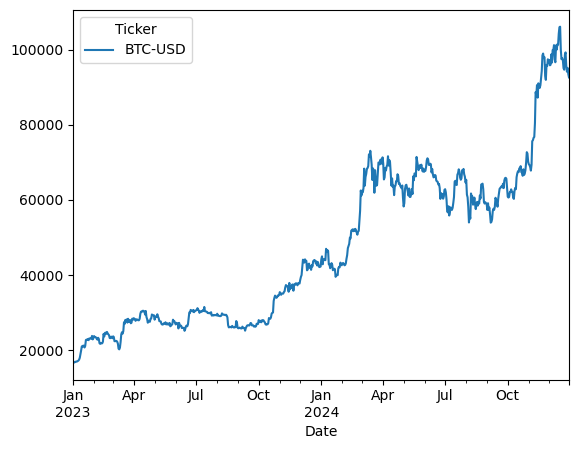

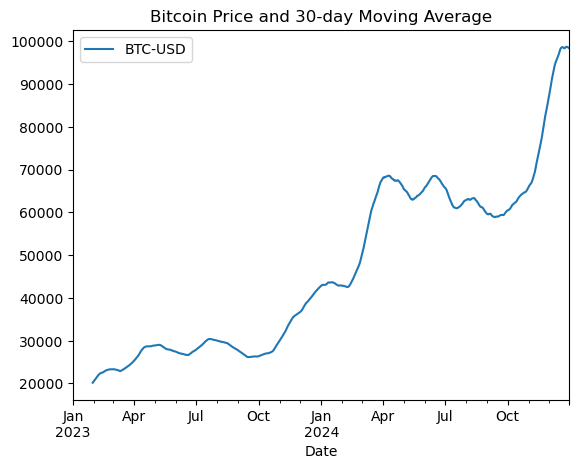

In [14]:
plt.figure(figsize=(10, 6))
df_prices['Bitcoin'].plot(label='Bitcoin Price')
df_prices['Bitcoin'].rolling(window=30).mean().plot(label='30-day Moving Average')
plt.title('Bitcoin Price and 30-day Moving Average')
plt.legend()
plt.show()


/var/folders/6k/7zpq8_wj3zb9tnf__3yh3qs80000gn/T/ipykernel_27227/1249870562.py:7: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(returns.index, returns[column], label=column)


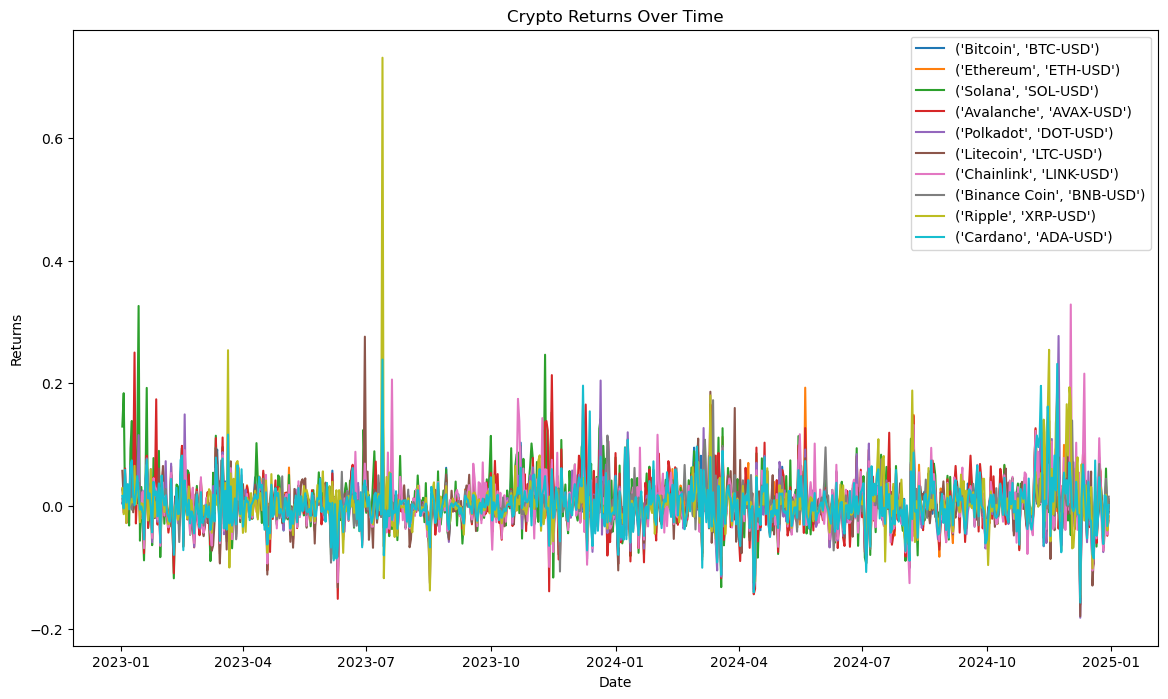

In [16]:
returns = df_prices.pct_change().dropna()
plt.figure(figsize=(14, 8))
for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column)

plt.title("Crypto Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()


Mean Squared Error: 4111759.704365483


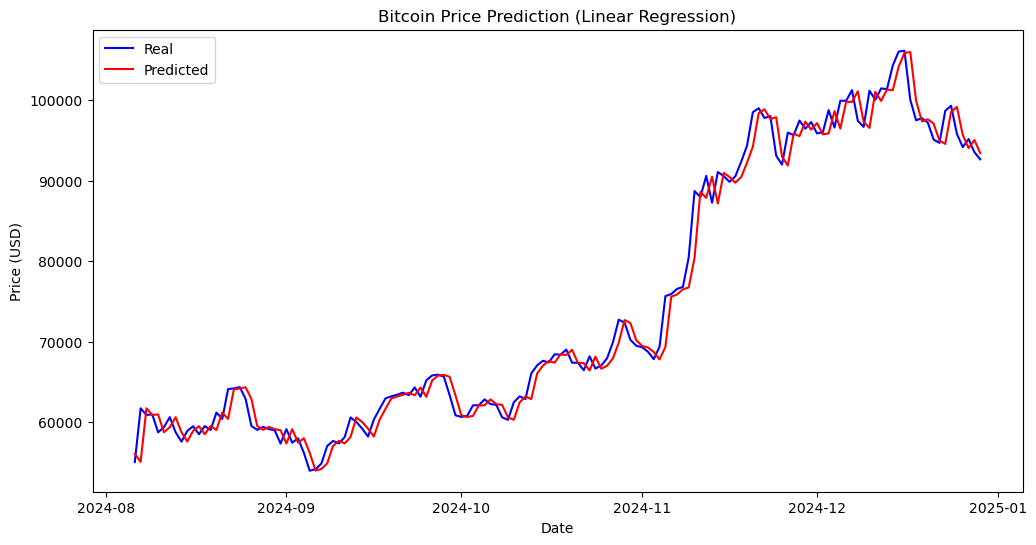

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_bitcoin = df_prices[["Bitcoin"]].copy()

df_bitcoin["Bitcoin_next"] = df_bitcoin["Bitcoin"].shift(-1)

df_bitcoin.dropna(inplace=True)

X = df_bitcoin[["Bitcoin"]]
y = df_bitcoin["Bitcoin_next"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin.index[-len(y_test):], y_test, label="Real", color='blue')
plt.plot(df_bitcoin.index[-len(y_test):], y_pred, label="Predicted", color='red')
plt.title("Bitcoin Price Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


Mean Squared Error with SMA: 3923981.728763861


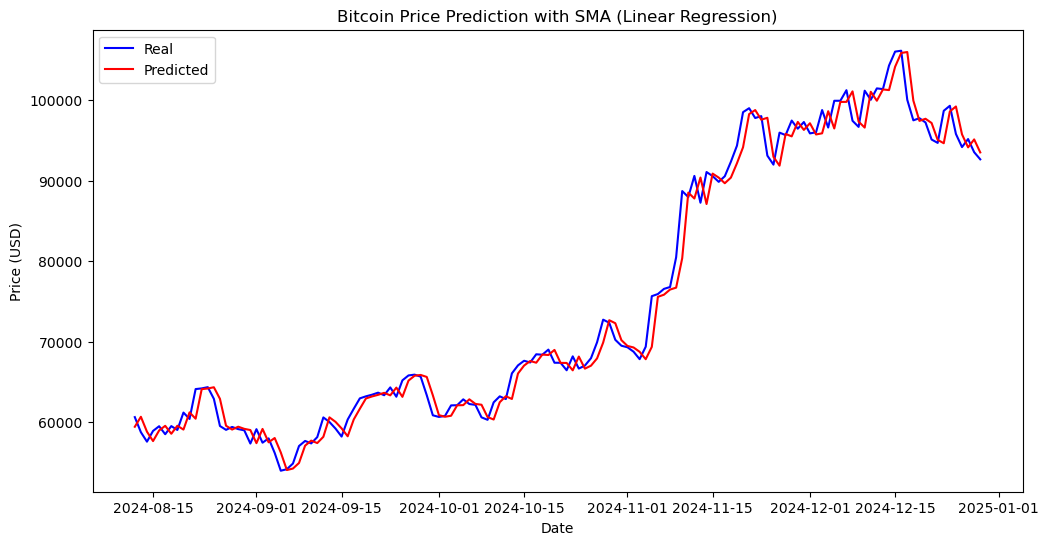

In [22]:
df_prices['Bitcoin_SMA_30'] = df_prices['Bitcoin'].rolling(window=30).mean()
df_bitcoin = df_prices[["Bitcoin", "Bitcoin_SMA_30"]].copy()
df_bitcoin["Bitcoin_next"] = df_bitcoin["Bitcoin"].shift(-1)
df_bitcoin.dropna(inplace=True)

X = df_bitcoin[["Bitcoin", "Bitcoin_SMA_30"]]
y = df_bitcoin["Bitcoin_next"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with SMA: {mse}")

plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin.index[-len(y_test):], y_test, label="Real", color='blue')
plt.plot(df_bitcoin.index[-len(y_test):], y_pred, label="Predicted", color='red')
plt.title("Bitcoin Price Prediction with SMA (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


Mean Squared Error with Random Forest: 267584066.23004177


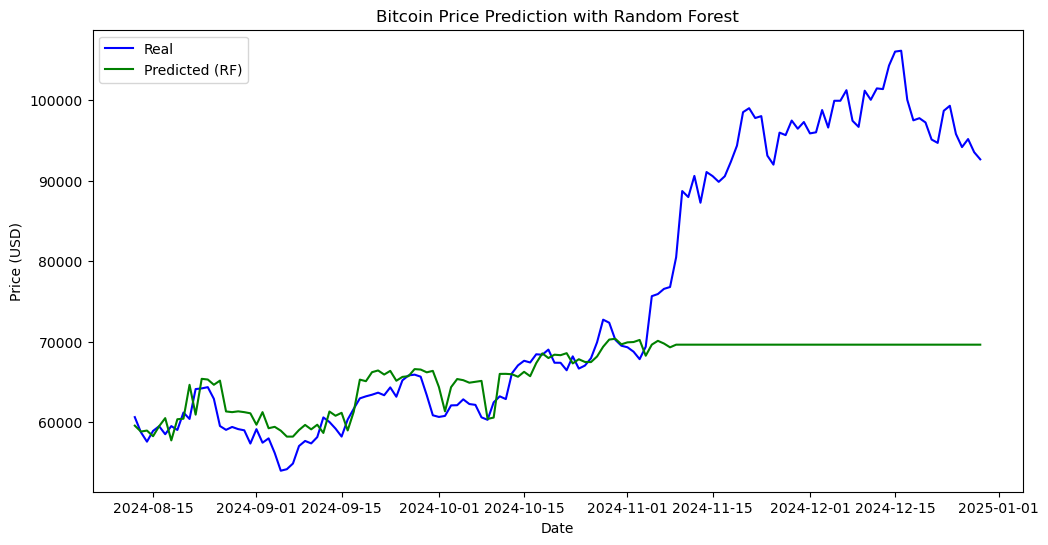

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error with Random Forest: {mse_rf}")

plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin.index[-len(y_test):], y_test, label="Real", color='blue')
plt.plot(df_bitcoin.index[-len(y_test):], y_pred_rf, label="Predicted (RF)", color='green')
plt.title("Bitcoin Price Prediction with Random Forest")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [18]:
returns.to_csv("crypto_returns.csv")
